In [44]:
#install QUANDL
#pip install quandl

In [1]:
#import libraries
import numpy as np
import pandas as pd
import quandl, math, datetime
from sklearn import preprocessing, svm
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
from matplotlib import style
import pickle

style.use('ggplot')

In [64]:
#ign up on quandl.com to get an api key
df =  quandl.get('WIKI/GOOGL')
print (df.head())

              Open    High     Low    Close      Volume  Ex-Dividend  \
Date                                                                   
2004-08-19  100.01  104.06   95.96  100.335  44659000.0          0.0   
2004-08-20  101.01  109.08  100.50  108.310  22834300.0          0.0   
2004-08-23  110.76  113.48  109.05  109.400  18256100.0          0.0   
2004-08-24  111.24  111.60  103.57  104.870  15247300.0          0.0   
2004-08-25  104.76  108.00  103.88  106.000   9188600.0          0.0   

            Split Ratio  Adj. Open  Adj. High   Adj. Low  Adj. Close  \
Date                                                                   
2004-08-19          1.0  50.159839  52.191109  48.128568   50.322842   
2004-08-20          1.0  50.661387  54.708881  50.405597   54.322689   
2004-08-23          1.0  55.551482  56.915693  54.693835   54.869377   
2004-08-24          1.0  55.792225  55.972783  51.945350   52.597363   
2004-08-25          1.0  52.542193  54.167209  52.100830   53.1

In [65]:
df = df[['Adj. Open', 'Adj. High', 'Adj. Low', 'Adj. Close', 'Adj. Volume']]
df['HL_PCT'] = (df['Adj. High'] - df['Adj. Close']) / df['Adj. Close'] * 100.0
df['PCT_change'] = (df["Adj. Close"] - df['Adj. Open']) / df['Adj. Open'] * 100.0

df = df[['Adj. Close', 'HL_PCT', 'PCT_change', 'Adj. Volume']]
print(df.head())

            Adj. Close    HL_PCT  PCT_change  Adj. Volume
Date                                                     
2004-08-19   50.322842  3.712563    0.324968   44659000.0
2004-08-20   54.322689  0.710922    7.227007   22834300.0
2004-08-23   54.869377  3.729433   -1.227880   18256100.0
2004-08-24   52.597363  6.417469   -5.726357   15247300.0
2004-08-25   53.164113  1.886792    1.183658    9188600.0


In [66]:
forecast_col = 'Adj. Close'
df.fillna(-99999, inplace=True) #fill missing values

forecast_out = int(math.ceil(0.01*len(df)))
print(forecast_out)

df['label'] = df[forecast_col].shift(-forecast_out) #create the label column

print(df.head())

35
            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label
Date                                                                
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849


In [67]:
#define x (features) and y(labels)
X = np.array(df.drop(['label'],1))
X = X[:-forecast_out]
X_lately = X[-forecast_out:]
#scale x alongside all other values
X = preprocessing.scale(X)


In [68]:
df.dropna(inplace=True)y = np.array(df['label'])
y = np.array(df['label'])
print(len(X), len(y))

3389 3389


In [69]:
#create train and test set
x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
clf=LinearRegression(n_jobs=10)
clf.fit(x_train, y_train)

Accuracy = clf.score(x_test, y_test)

print(Accuracy)

0.9804446342273516


In [70]:
#We save the classifier. the purpose of saving the classifier is to avoidf doing the training step
#with open('linearregression.pickle','wb') as f:
 #   pickle.dump(clf, f)
pickle_in = open('linearregression.pickle','rb')
clf = pickle.load(pickle_in)

In [71]:
#forecasting the next 35 days of prices
forecast_set = clf.predict(X_lately)
print(forecast_set, Accuracy, forecast_out)

[1076.56332466 1091.0247651  1104.87087942 1099.51814338 1093.10049589
 1090.45706665 1088.74927715 1085.70869797 1079.70655269 1075.37804339
 1072.94994567 1092.59611163 1111.01276188 1115.43131779 1130.21622368
 1134.2399158  1132.82914423 1130.31003537 1132.0730398  1150.58707949
 1150.08093662 1159.57941186 1156.25591919 1163.95683783 1184.45549479
 1196.67525243 1191.25428782 1202.86987218 1208.32674616 1206.76206681
 1197.51702396 1202.84105879 1201.63771324 1137.48531192 1085.45550938] 0.9804446342273516 35


            Adj. Close    HL_PCT  PCT_change  Adj. Volume      label  Forecast
Date                                                                          
2004-08-19   50.322842  3.712563    0.324968   44659000.0  69.078238       NaN
2004-08-20   54.322689  0.710922    7.227007   22834300.0  67.839414       NaN
2004-08-23   54.869377  3.729433   -1.227880   18256100.0  68.912727       NaN
2004-08-24   52.597363  6.417469   -5.726357   15247300.0  70.668146       NaN
2004-08-25   53.164113  1.886792    1.183658    9188600.0  71.219849       NaN
                     Adj. Close  HL_PCT  PCT_change  Adj. Volume  label  \
Date                                                                      
2018-03-08 01:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-09 01:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-10 01:00:00         NaN     NaN         NaN          NaN    NaN   
2018-03-11 01:00:00         NaN     NaN         NaN          NaN    NaN 

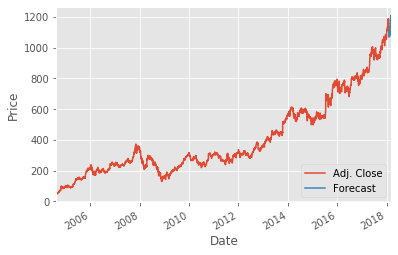

In [72]:
df['Forecast'] = np.nan

last_date = df.iloc[-1].name
last_unix = last_date.timestamp()
one_day = 86400
next_unix = last_unix + one_day

#forloop to have dates on the x axis in a plot
for i in forecast_set:
    next_date = datetime.datetime.fromtimestamp(next_unix)
    next_unix += one_day
    df.loc[next_date] = [np.nan for _ in range(len(df.columns)-1)] + [i] #list of values for np.nan
    
print(df.head())
print(df.tail())

df['Adj. Close'].plot()
df['Forecast'].plot()
plt.legend(loc=4)
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

In [2]:
#Building linear regression from the scratch
#how to program thhe best slope fit

from statistics import mean

In [46]:
### Day 6
### Pickling and scaling

In [47]:
##Day 7
##How regression works

In [41]:
#best slope fit
xs = np.array([1,2,3,4,5,6], dtype=np.float64)
ys = np.array([5,4,6,5,6,8], dtype=np.float64)

xs, ys

(array([1., 2., 3., 4., 5., 6.]), array([5., 4., 6., 5., 6., 8.]))

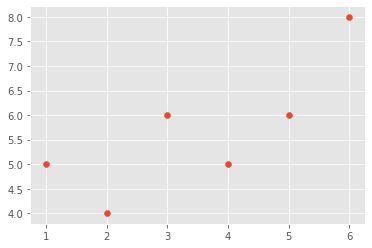

In [42]:
#plot a scateer plot of xs and ys
plt.scatter(xs,ys)
plt.show()

In [43]:
#define a function that returns a best fit slope
def best_fit_slope(xs,ys):
    m = ( ((mean(xs) * mean(ys)) - mean(xs*ys)) / 
         ((mean(xs) * mean(xs)) - mean(xs*xs)) )
    return m
m = best_fit_slope(xs,ys)
         
print(m)

0.5714285714285707
